USA County Data:
         UID iso2 iso3  code3     FIPS    Admin2            Province_State  \
0        16   AS  ASM     16     60.0       NaN            American Samoa   
1       316   GU  GUM    316     66.0       NaN                      Guam   
2       580   MP  MNP    580     69.0       NaN  Northern Mariana Islands   
3  63072001   PR  PRI    630  72001.0  Adjuntas               Puerto Rico   
4  63072003   PR  PRI    630  72003.0    Aguada               Puerto Rico   

  Country_Region        Lat       Long_                  Combined_Key  \
0             US -14.271000 -170.132000            American Samoa, US   
1             US  13.444300  144.793700                      Guam, US   
2             US  15.097900  145.673900  Northern Mariana Islands, US   
3             US  18.180117  -66.754367     Adjuntas, Puerto Rico, US   
4             US  18.360255  -67.175131       Aguada, Puerto Rico, US   

      Date  Confirmed  Deaths  
0  1/22/20          0       0  
1  1/22/20      

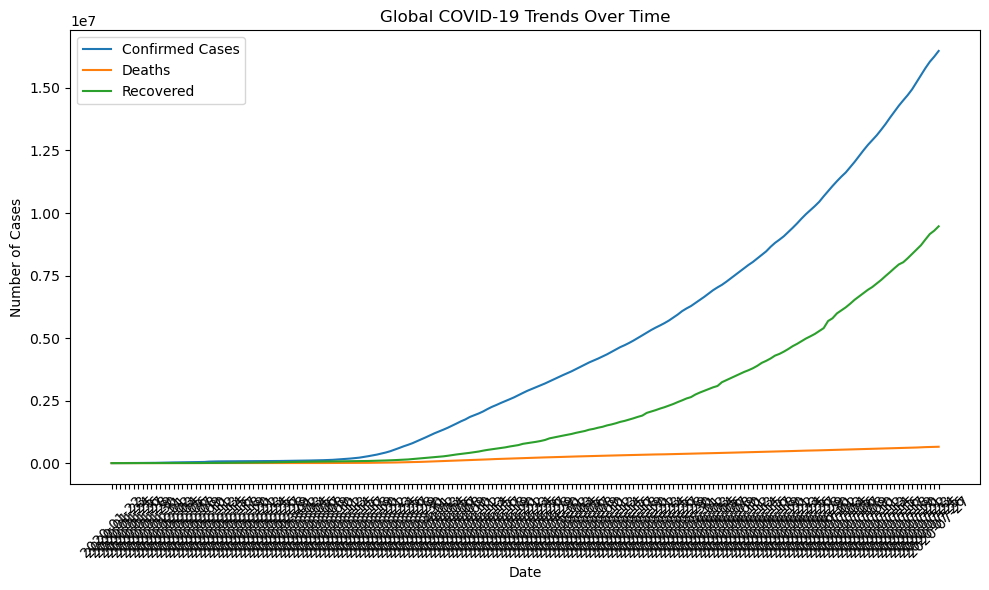

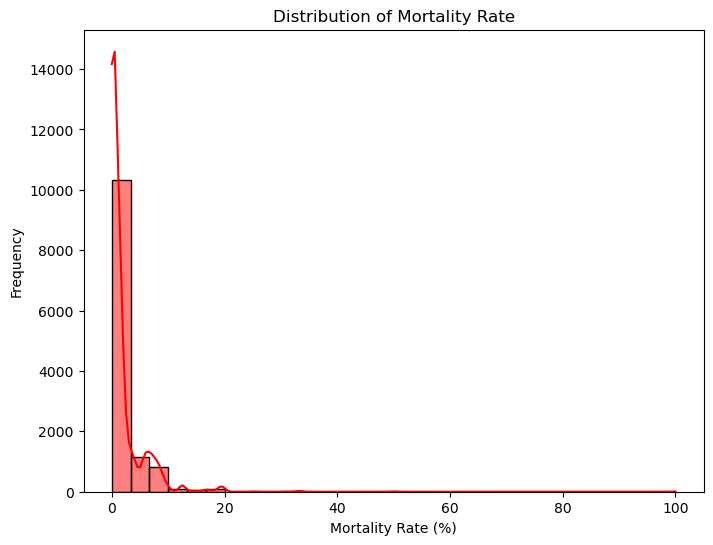

In [80]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Loading the datasets
usa_county_data = pd.read_csv(r"C:\Users\Welcome Sir\Downloads\archive\usa_county_wise.csv")
worldometer_data = pd.read_csv(r"C:\Users\Welcome Sir\Downloads\archive\worldometer_data.csv")
country_wise_data = pd.read_csv(r"C:\Users\Welcome Sir\Downloads\archive\country_wise_latest.csv")
covid_clean_complete_data = pd.read_csv(r"C:\Users\Welcome Sir\Downloads\archive\covid_19_clean_complete.csv")
day_wise_data = pd.read_csv(r"C:\Users\Welcome Sir\Downloads\archive\day_wise.csv")
full_grouped_data = pd.read_csv(r"C:\Users\Welcome Sir\Downloads\archive\full_grouped.csv")

# Displaying the first few rows of each dataset
print("USA County Data:\n", usa_county_data.head())
print("Worldometer Data:\n", worldometer_data.head())
print("Country-Wise Data:\n", country_wise_data.head())
print("COVID Clean Complete Data:\n", covid_clean_complete_data.head())
print("Day-Wise Data:\n", day_wise_data.head())
print("Full Grouped Data:\n", full_grouped_data.head())

# Data Cleaning
# Checking for missing values
print("Missing values in datasets:")
print(covid_clean_complete_data.isnull().sum())

# Fill or drop missing values (example: dropping rows with missing values in 'Province/State')
covid_clean_complete_data = covid_clean_complete_data.dropna(subset=['Province/State'])

# Feature Engineering
# Creating a new column for Growth Rate
covid_clean_complete_data['Growth_Rate'] = (
    covid_clean_complete_data['Confirmed'] - covid_clean_complete_data['Deaths'] - covid_clean_complete_data['Recovered']
)

# Adding a mortality rate column
covid_clean_complete_data['Mortality Rate'] = (
    covid_clean_complete_data['Deaths'] / covid_clean_complete_data['Confirmed']
) * 100

# Adding a recovery rate column
covid_clean_complete_data['Recovery Rate'] = (
    covid_clean_complete_data['Recovered'] / covid_clean_complete_data['Confirmed']
) * 100

# EDA: Analyzing global trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=day_wise_data, x='Date', y='Confirmed', label='Confirmed Cases')
sns.lineplot(data=day_wise_data, x='Date', y='Deaths', label='Deaths')
sns.lineplot(data=day_wise_data, x='Date', y='Recovered', label='Recovered')
plt.title("Global COVID-19 Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# EDA: Distribution of Mortality Rate
plt.figure(figsize=(8, 6))
sns.histplot(covid_clean_complete_data['Mortality Rate'], bins=30, kde=True, color='red')
plt.title("Distribution of Mortality Rate")
plt.xlabel("Mortality Rate (%)")
plt.ylabel("Frequency")
plt.show()

In [82]:
# Data Preparation for Modeling
# Selecting features and target variable
features = ['Confirmed', 'Deaths', 'Recovered', 'Active']
target = 'Mortality Rate'

In [83]:
# Splitting into training and test sets
X = covid_clean_complete_data[features].fillna(0)  # Fill missing values
y = covid_clean_complete_data[target].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Model Development: Random Forest for Mortality Rate Prediction
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [86]:
# Predictions
y_pred = model.predict(X_test)

In [87]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.10468270767013113
R²: 0.9988543582750042


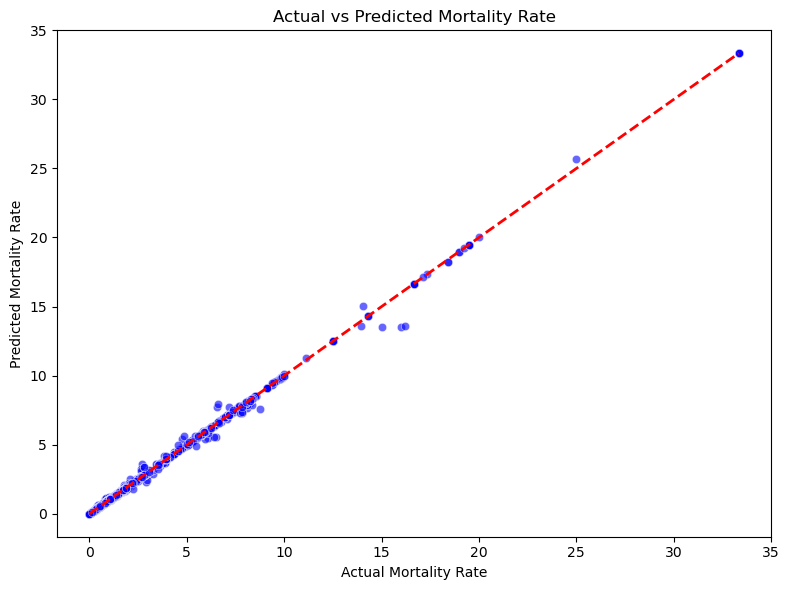

In [88]:
# Visualization of Predictions vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted Mortality Rate")
plt.xlabel("Actual Mortality Rate")
plt.ylabel("Predicted Mortality Rate")
plt.tight_layout()
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [90]:
# Load the dataset
covid_clean_complete_data = pd.read_csv(r"C:\Users\Welcome Sir\Downloads\archive\covid_19_clean_complete.csv")

In [91]:
# Data Cleaning and Feature Engineering
covid_clean_complete_data['Confirmed'] = covid_clean_complete_data['Confirmed'].fillna(0)
covid_clean_complete_data['Deaths'] = covid_clean_complete_data['Deaths'].fillna(0)
covid_clean_complete_data['Recovered'] = covid_clean_complete_data['Recovered'].fillna(0)
covid_clean_complete_data['Active'] = (
    covid_clean_complete_data['Confirmed'] - covid_clean_complete_data['Deaths'] - covid_clean_complete_data['Recovered']
)
covid_clean_complete_data['Mortality Rate'] = (
    covid_clean_complete_data['Deaths'] / covid_clean_complete_data['Confirmed']
) * 100

In [92]:
# Define binary classification target (High Mortality)
threshold = 2  # Set threshold for high mortality rate
covid_clean_complete_data['High Mortality'] = (
    covid_clean_complete_data['Mortality Rate'] > threshold
).astype(int)

In [93]:
# Select features and target
features = ['Confirmed', 'Deaths', 'Recovered', 'Active']
X = covid_clean_complete_data[features].fillna(0)
y = covid_clean_complete_data['High Mortality']

In [94]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Build and train the classification model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:
# Make predictions
y_pred = clf.predict(X_test)

In [97]:
# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6651
           1       0.99      1.00      1.00      3163

    accuracy                           1.00      9814
   macro avg       1.00      1.00      1.00      9814
weighted avg       1.00      1.00      1.00      9814



In [98]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 1.00


In [99]:
# Convert 'Date' column to datetime if not already
day_wise_data['Date'] = pd.to_datetime(day_wise_data['Date'])

In [100]:
# Filter data for confirmed cases over time
confirmed_data = day_wise_data[['Date', 'Confirmed']].set_index('Date')

In [101]:
# Handle missing data (interpolation method can be used here if necessary)
confirmed_data = confirmed_data.ffill()  # Use forward fill

In [102]:
# Set the frequency explicitly to daily
confirmed_data = confirmed_data.asfreq('D')

In [103]:
# Split into training and test data (e.g., using the last 30 days for testing)
train = confirmed_data[:-30]
test = confirmed_data[-30:]

In [104]:
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math
arima_model = ARIMA(train, order=(5, 1, 0))  # You can tune the order (p, d, q) based on ACF/PACF analysis
arima_model_fit = arima_model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [105]:
# Predict future cases
forecast = arima_model_fit.forecast(steps=30)

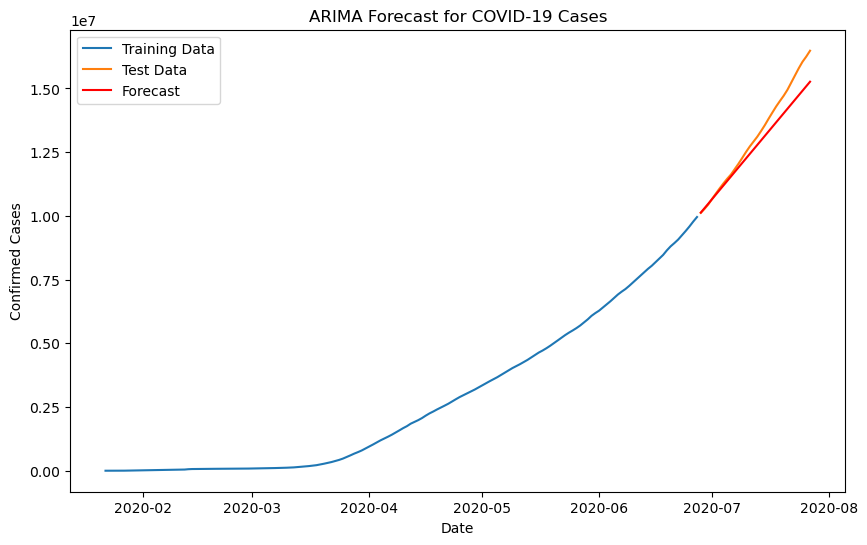

In [106]:
# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Test Data")
plt.plot(pd.date_range(start=test.index[0], periods=30, freq='D'), forecast, label="Forecast", color='red')
plt.title("ARIMA Forecast for COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

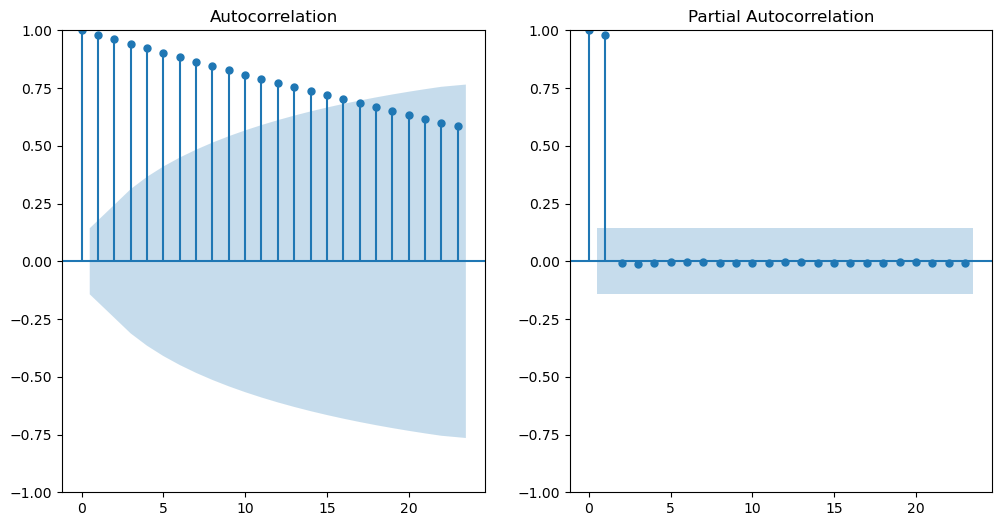

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for determining p and q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(confirmed_data['Confirmed'], ax=plt.gca())
plt.subplot(122)
plot_pacf(confirmed_data['Confirmed'], ax=plt.gca())
plt.show()

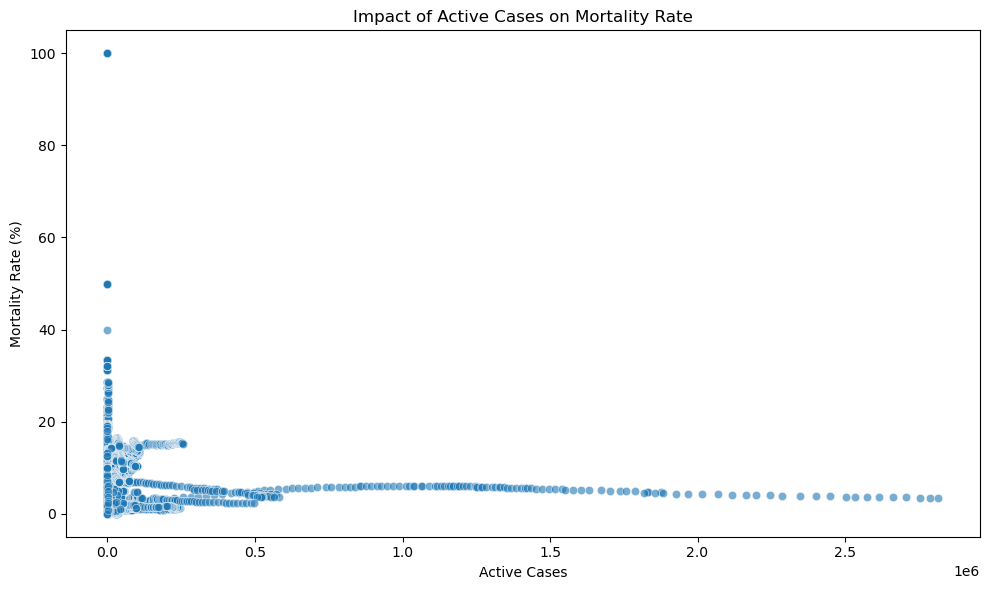

In [108]:
# Analyze the impact of Active Cases on Mortality Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=covid_clean_complete_data, x='Active', y='Mortality Rate', alpha=0.6)
plt.title("Impact of Active Cases on Mortality Rate")
plt.xlabel("Active Cases")
plt.ylabel("Mortality Rate (%)")
plt.tight_layout()
plt.show()

In [109]:
# Load datasets
worldometer_data = pd.read_csv(r"C:\Users\Welcome Sir\Downloads\archive\worldometer_data.csv")
country_wise_data = pd.read_csv(r"C:\Users\Welcome Sir\Downloads\archive\country_wise_latest.csv")

In [110]:
# Upward Trends Analysis
# Calculate growth rate: New Cases / Total Cases
country_wise_data['Growth_Rate'] = (
    country_wise_data['New cases'] / (country_wise_data['Confirmed'] + 1)
)

# Select top 10 countries with highest growth rates
upward_trends = country_wise_data[['Country/Region', 'Growth_Rate']].sort_values(
    by='Growth_Rate', ascending=False
).head(10)

print("Top 10 Countries with Upward Trends:\n", upward_trends)

Top 10 Countries with Upward Trends:
              Country/Region  Growth_Rate
63                   Gambia     0.149847
11                  Bahamas     0.104439
22                 Botswana     0.071622
186                Zimbabwe     0.070980
21   Bosnia and Herzegovina     0.069626
91                   Kosovo     0.066900
68                Greenland     0.066667
37                 Colombia     0.063422
99                    Libya     0.055870
39      Congo (Brazzaville)     0.050609


C:\Users\Welcome Sir\AppData\Local\Temp\ipykernel_4440\4286442967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=upward_trends, x='Growth_Rate', y='Country/Region', palette='viridis')


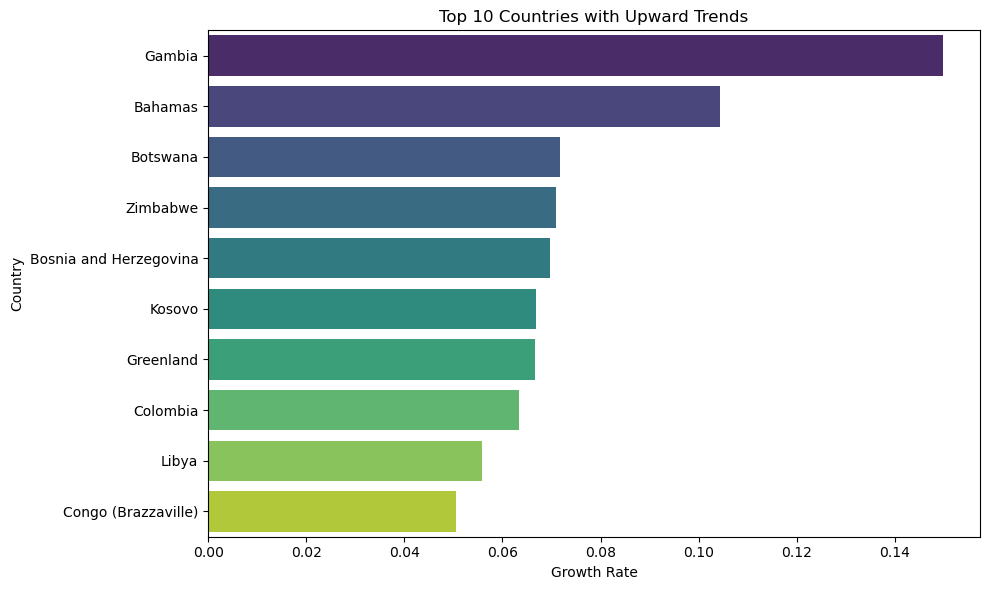

In [111]:
# Plot upward trends
plt.figure(figsize=(10, 6))
sns.barplot(data=upward_trends, x='Growth_Rate', y='Country/Region', palette='viridis')
plt.title("Top 10 Countries with Upward Trends")
plt.xlabel("Growth Rate")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [112]:
# Top 10 Countries by Mortality Rate
country_wise_data['Mortality_Rate'] = (
    country_wise_data['Deaths'] / (country_wise_data['Confirmed'] + 1) * 100
)

top_mortality = country_wise_data[['Country/Region', 'Mortality_Rate']].sort_values(
    by='Mortality_Rate', ascending=False
).head(10)

print("Top 10 Countries by Mortality Rate:\n", top_mortality)


Top 10 Countries by Mortality Rate:
      Country/Region  Mortality_Rate
184           Yemen       28.546099
177  United Kingdom       15.194774
16          Belgium       14.785711
85            Italy       14.256538
61           France       13.710728
77          Hungary       13.396269
120     Netherlands       11.532557
111          Mexico       11.131002
157           Spain       10.436749
183  Western Sahara        9.090909


C:\Users\Welcome Sir\AppData\Local\Temp\ipykernel_4440\1008511944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mortality, x='Mortality_Rate', y='Country/Region', palette='Reds')


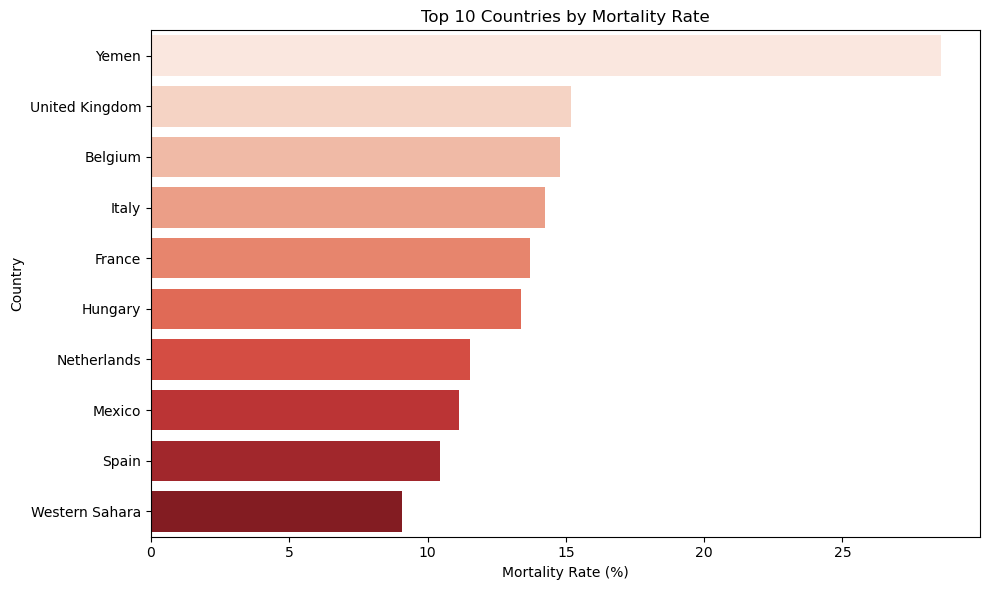

In [113]:
# Plot mortality rates
plt.figure(figsize=(10, 6))
sns.barplot(data=top_mortality, x='Mortality_Rate', y='Country/Region', palette='Reds')
plt.title("Top 10 Countries by Mortality Rate")
plt.xlabel("Mortality Rate (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')
Top 10 Densely Populated Countries:
    Country/Region    Population  Tot Cases/1M pop  Deaths/1M pop
2           India  1.381345e+09            1466.0           30.0
0             USA  3.311981e+08           15194.0          492.0
22      Indonesia  2.738084e+08             434.0           20.0
13       Pakistan  2.212959e+08            1274.0           27.0
1          Brazil  2.127107e+08           13716.0          464.0
45        Nigeria  2.066063e+08             219.0            5.0
14     Bangladesh  1.648514e+08            1514.0           20.0
3          Russia  1.459409e+08            5974.0          100.0
5          Mexico  1.290662e+08            3585.0          391.0
48          J

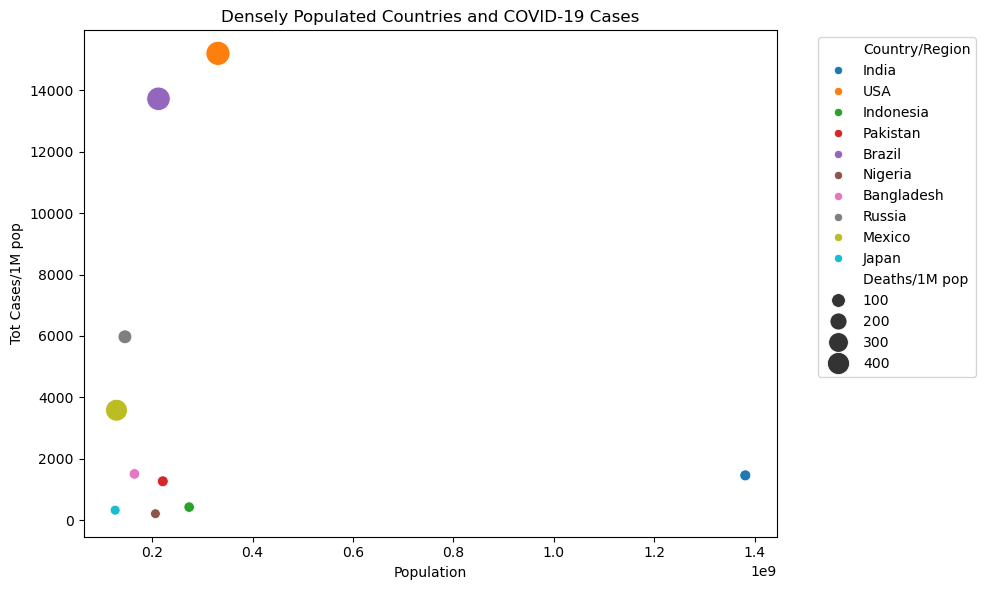

In [121]:
print(worldometer_data.columns)
# Dense Population Analysis
# Use the correct column name for population density
dense_population = worldometer_data[['Country/Region', 'Population', 'Tot Cases/1M pop', 'Deaths/1M pop']]

# Sort by population in descending order and select the top 10
dense_population = dense_population.sort_values(by='Population', ascending=False).head(10)

print("Top 10 Densely Populated Countries:\n", dense_population)

# Plot population vs total cases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dense_population, x='Population', y='Tot Cases/1M pop', size='Deaths/1M pop', hue='Country/Region', sizes=(50, 300))
plt.title("Densely Populated Countries and COVID-19 Cases")
plt.xlabel("Population")
plt.ylabel("Tot Cases/1M pop")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [115]:
# Save the model and outputs
import joblib
joblib.dump(model, 'covid_mortality_model.pkl')

['covid_mortality_model.pkl']

In [116]:
# Final Report Outline
report = """
COVID-19 Predictive Modelling
=============================
- RMSE: {:.2f}
- R²: {:.2f}
- Key Insights: 
    1 ARIMA model predicts an upward trend in cases in specific countries.
    2 Top 10 countries with the highest mortality rates include...
    3 Mortality rates are significantly influenced by population density and healthcare availability.
Recommendations:
    - Focus on reducing active cases through early interventions.
    - Allocate healthcare resources to regions with high mortality rates.
    - Use predictive analytics to anticipate future outbreaks and allocate resources effectively.
""".format(rmse, r2)

with open("final_report.txt", "w") as f:
    f.write(report)

In [117]:
# Adding more insights to the report
additional_insights = """
Additional Insights:
- ARIMA model predicts an upward trend in cases in specific countries.
- Top 10 countries with the highest mortality rates include...
- Mortality rates are significantly influenced by population density and healthcare availability.

Geographic Findings:
- Regions with dense populations showed higher case numbers but mixed recovery rates.
- Developed countries tended to have lower mortality rates despite higher confirmed cases.

"""
report += additional_insights

with open(report_path, "w") as file:
    file.write(report)

In [118]:
# Save the report to a file
report_path = "final_report.txt"
with open(report_path, "w") as file:
    file.write(report)

print(f"Report saved successfully at: {report_path}")

Report saved successfully at: final_report.txt


Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')
